
# МАТЕМАТИЧНЕ МОДЕЛЮВАННЯ МАТЕРІАЛІВ ТА ТЕХНОЛОГІЧНИХ ПРОЦЕСІВ В МАТЕРІАЛОЗНАВСТВІ
Комп'ютерний практикум

*Виконав студент групи ФМ-71мп*

*Богомаз Ростислав*

## АНАЛІТИЧНА МАТЕМАТИЧНА МОДЕЛЬ НАГРІВАННЯ МЕТАЛЕВОГО ВИРОБУ В ПЕЧІ ДЛЯ НАСТУПНОЇ ТЕРМІЧНОЇ ОБРОБКИ

**Мета роботи:** освоєння принципів побудови детермінованої аналітичної математичної моделі із зосередженими параметрами та визначення часу нагріву металевого виробу.

### Завдання та вихідні дані
Розрахувати час нагріву заготівки $t_{h}$, яка нагрівається в печі та побудувати графік залежності температури від часу в процесі нагрівання. Розрахунки провести використовуючи для цього детерміновану, інтегральну, аналітичну математичну модель із зосередженими параметрами.

Вихідні дані:

In [41]:
# Defining variablbbes
# Материал Cu
# material constants
density = 8873  # густина металу кг/м3
alpha = 200  # Вт*м-2*К-1
heat_capacity = [385, 442]  # 300 K and 800 K
thermal_emissivity = 0.78  # для міді (epsilon)

# constants
Stefan_Bolzman = 5.6704e-8  # Вт / (м^2 * К^4)

# geometry, m
width, length, high = 0.1, 0.1, 0.1

# температура печі
T_furnace = 600 + 273.0  # K
T_specimen = 20 + 273.0  # K
DeltaT = 1  # %

### Порядок виконання

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Розрахунок площі поверхні та маси зразка:

In [43]:
square = (width * length + width * high + length * high) * 2
volume = width * length * high
mass = volume * density
square, volume, mass

(0.06000000000000001, 0.0010000000000000002, 8.873000000000003)

Визначаємо температуру закінчення розрахунків Тк:

In [44]:
T_last = (1 - 0.01 * DeltaT) * T_furnace
T_last

864.27

Розраховуємо середню теплоємність через лінійний закон:

In [45]:
heat_cap_line = np.poly1d(np.polyfit([300, 800], heat_capacity, 1))
c = heat_cap_line(np.mean([T_furnace, T_specimen]))
c

417.26200000000006

Розраховуємо коефіцієнт $k$ та час нагріву:

In [46]:
k = alpha * square / (c * mass)
heat_time = -np.log((T_furnace - T_last) / (T_furnace - T_specimen)) / k
k, heat_time


(0.0032411708858823842, 1294.6749435417539)

Будуємо графік:

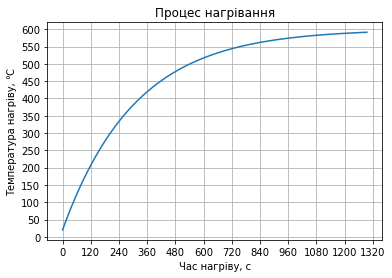

In [47]:
# дані для побудови
lab1_x = np.arange(0, heat_time, 0.5)
lab1_y = T_furnace - (T_furnace - T_specimen) * np.exp(-k * lab1_x)

plt.plot(lab1_x, lab1_y - 273.0)
plt.xticks(np.arange(lab1_x[0], lab1_x[-1] + 60, 120))
plt.yticks(np.arange(0, 601, 50))
plt.title("Процес нагрівання")
plt.ylabel(u"Температура нагріву, ℃")
plt.xlabel(u"Час нагріву, c")
plt.grid()

### Висновки
Була побудована детермінована аналітична математична модель із зосередженими параметрами для визначення часу нагріву металевого виробу.

Отримано, що за даними параметрами зразок в печі нагрівається до температури печі за 22 хв. (1300 с).


## ЧИСЛОВА МАТЕМАТИЧНА МОДЕЛЬ НАГРІВАННЯ МЕТАЛЕВОГО ВИРОБУ В ПЕЧІ ДЛЯ НАСТУПНОЇ ТЕРМІЧНОЇ ОБРОБКИ

**Мета роботи:** освоєння принципів побудови детермінованої числової математичної моделі із зосередженими параметрами та визначення впливів залежності питомої теплоємності від температури і випромінювання на процес нагріву металевого виробу. 

### Завдання та вихідні дані
Розрахувати час нагріву заготовки $t_\text{н}$, яка нагрівається в печі та побудувати графік залежності температури від часу в процесі нагрівання. Розрахунки провести використовуючи ітераційну формулу чисельної математичної моделі із зосередженими параметрами. Дані для розрахунків задані в комп’ютерному практикумі №1.

Розрахунки провести при наступних умовах:
1. $a_0 = c$; $a_1 = 0$; $\epsilon = 0$. В цьому випадку розрахунки можна порівняти з результатами, які отримані в комп’ютерному практикумі №1.
2. $a_0 \neq c$; $a_1 \neq 0$; $\epsilon = 0$. В цьому випадку розрахунки показують вплив залежності питомої теплоємності від температури на динаміку процесу нагріву.
3. $a_0 \neq c$; $a_1 \neq 0$; $\epsilon = 0.78$. В цьому випадку розрахунки показують вплив залежності питомої теплоємності від температури та врахування нагріву шляхом випромінювання на динаміку процесу нагріву.

Побудувати графіки для трьох варіантів розрахунків і порівняти їх між собою та з результатами, що отримані в комп’ютерному практикумі №1.  


### Порядок виконання

Реалізовуємо ітеративну функцію для розрахунку температури за формулою:
$$ T_{i+1} = T_i + h \frac{k_1(T_f-T_i)+k_2(T_f^4 - T_i^4)}{a_0 + a_1 T_i} $$
де:

- $T_{i+1}$, $T_{i}$ та $T_f$ -- відповідно наступна, попередня температури та температура печі,
- $h$ -- крок по часу
- $a_0$, $a_1$ -- емпіричні коефіцієнти з лінійної апроксимації темпоємності.

Коефіцієнти $k_1$, $k_2$ розраховуються таким чином:
$$ k_1 = \frac{\alpha S}{m},$$
$$k_2 = \frac{\sigma \epsilon S}{m}$$,
де:

- $\alpha$ - коефіцієнт теплопереносу
- $\sigma$ - стала Стефана-Больцмана
- $\epsilon$ - випромінювальна здатність
- $S$ - площа поверхні зразка
- $m$ - маса зразка

In [48]:
def lab2_data(a0, a1, epsilon):
    # коефіцієнти
    k1 = alpha * square / mass
    k2 = Stefan_Bolzman * epsilon * square / mass
    step = 10  # крок

    time_array = [0]
    i = 0

    T_array = [T_specimen]
    T_next = T_array[0]

    while T_next <= T_last:
        i += 1
        T_next = T_next + step * (k1 * (T_furnace - T_next) +
                                  k2 * (T_furnace ** 4 - T_next ** 4)
                                  ) / (a0 + a1 * T_next)
        T_array.append(T_next)
        time_array.append(step*i)
    return np.array(time_array), np.array(T_array)

$a_0 = c$; $a_1 = 0$; $\epsilon = 0$:

In [49]:
lab2_x1, lab2_y1 = lab2_data(c, 0, 0)

$a_0 \neq c$; $a_1 \neq 0$; $\epsilon = 0$:

In [50]:
lab2_x2, lab2_y2 = lab2_data(heat_cap_line[0],
                             heat_cap_line[1],
                             0)

$a_0 \neq c$; $a_1 \neq 0$; $\epsilon = 0.78$:

In [51]:
lab2_x3, lab2_y3 = lab2_data(heat_cap_line[0],
                             heat_cap_line[1],
                             thermal_emissivity)

Будуємо графік залежності:

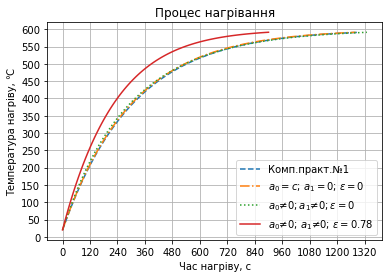

In [52]:
data_list = [(lab1_x, lab1_y, "Комп.практ.№1"),
            (lab2_x1, lab2_y1, "$а_0 = c$; $а_1 = 0$; $\epsilon = 0$"),
            (lab2_x2, lab2_y2, "$а_0 ≠ 0; а_1 ≠ 0; \epsilon = 0$"),
            (lab2_x3, lab2_y3, '$а_0 ≠ 0$; $а_1 ≠ 0$; $\epsilon = 0.78$')]

style_iter = iter(['--', '-.', ':', '-'])

for x, y, l in data_list:
    plt.plot(x, y-273.0, next(style_iter), label=l)
    
plt.legend()
plt.title("Процес нагрівання")
plt.ylabel(u"Температура нагріву, ℃")
plt.xlabel(u"Час нагріву, c")
plt.yticks(np.arange(0, 601, 50))
plt.xticks(np.arange(0, 1400, 120))
plt.grid()

Час нагріву до температури в перших двох випадках співпадає з результатом комп'ютерного практикуму №1 з точністю до хвилини. Урахування випромінювання в моделі ($\epsilon \neq 0$) скорочує час нагрівання - для даних параметрів час становить 15 хв. 

### Висновки
Побудована детермінована числова математична модель із зосередженими параметрами для визначення впливів залежності питомої теплоємності від температури і випромінювання на процес нагріву металевого виробу.

Урахування випромінювання в даній моделі скорочує час нагрівання зразку.

Урахування лінійної залежності теплоємності не впливає на отримані результати, отже для задовільної апроксимації достатньо середнього значення на даному проміжку температур.

## НАГРІВАННЯ МЕТАЛЕВОГО ВИРОБУ В ПЕЧІ ДЛЯ НАСТУПНОЇ ТЕРМІЧНОЇ ОБРОБКИ-3

**Мета роботи:** освоєння принципів побудови детермінованої числової математичної моделі із розподіленими параметрами та визначення часу нагріву металевого виробу.

### Завдання та вихідні дані
Розрахувати час нагріву заготівки $t_h$, яка нагрівається в печі та побудувати графік залежності температури від часу в процесі нагрівання в трьох точках, розташованих по перетину системи ($r_1 = 0, r_1 = \frac{r_0}{2}, r_1 = r_0$). Розрахунки провести використовуючи ітераційні формули чисельної математичної моделі із розгалуженими параметрами.

In [53]:
# geometry, m
R, length = 0.05, 0.1

# lambda
thermal_conductivity = [401, 366]  # W m-1 K-1 300 K and 800 K

# інші потрібні параметри співпадають з даними комп. практикуму №1

Розрахунок середньої теплоємності через лінійний закон:

In [54]:
lambda_line = np.poly1d(np.polyfit([300, 800], thermal_conductivity, 1))
lambd = lambda_line(np.mean([T_specimen, T_furnace]))
lambd

381.18999999999983

### Порядок виконання

Реалізуємо ітераційну функцію за рівнянням *явної різницевої схеми*:
$$T_i^{j+1} = \left(f + \frac{f}{i}\right)T_{i+1}^j + \left(1-2f\right)T_i^j + \left(f-\frac{f}{i}\right)T_{i-1}^j,$$
де:

- $j = 0 \dots M$ - номера кроки у часі
- $i = 1 \dots N-1$ - номера кроків по довжині (радіусу)
- $f$ - параметр, який розраховується за формулою:
$$f = \left( \frac{\lambda}{c \rho} \right) \frac{\tau}{h^2}$$

Для визначення крайніх точок $i=0$ та $i=N$ використовуємо формули, які випливають з граничних умов задачі:

$$ T_0^{j+1} = (1-2f) T_0^j+2f T_1^j $$

$$ T_N^{j+1} = 2f T_{N-1}^j + \left( 1 - 2f \left( 1 + \frac{\alpha h}{\lambda} \right) \right) T_N^j + 2f \frac{\alpha h}{\lambda} T_f $$

При цьому враховуємо умову збіжності даної числової схеми:
$$ f \leq \frac{1}{2}, $$
яка залежить від вибору кроків по часу $\tau$ та по довжині $h$.

In [55]:
def explicit_scheme(T, tau, R=R, T_f=T_furnace, T_last=T_last, alpha=alpha, 
                    lambd=thermal_conductivity[0], rho=density, c=heat_capacity[0]):
    N = len(T)
    h = R / N
    a = (lambd / (c * rho))
    f = a * tau / (h ** 2)
    if f > 0.5:
        raise Exception(f"Не виконується умова збіжності: f = {f}")
    
    Tnew = np.copy(T)
    i = np.arange(0, N)
    time = 0
    T_data = [np.copy(T)]
    while Tnew[0] < T_last:
        _k = alpha * h / lambd
        Tnew[1:-1] = (f+f/i[1:-1]) * T[2:] + (1 - 2*f) * T[1:-1] + (f - f/i[1:-1]) * T[:-2]
        Tnew[-1] = 2*f * T[-2] + (1 - 2*f * (1+_k)) * T[-1] + 2*f * _k * T_f
        Tnew[0] = (1 - 2*f) * T[0] + 2*f * T[1]
        T = np.copy(Tnew)
        T_data.append(np.copy(Tnew))
        time += tau
    return np.array(T_data), time


Розраховуємо час нагріву з параметрами моделі $N = 10$ та $\tau = 0.1$:

In [56]:
N = 10
T_initial = np.full(N, T_specimen)
T_data, time_heat = explicit_scheme(T_initial, 0.1, lambd=20)

In [57]:
time_heat/60

22.16833333333143

Нагрів до заданої температури відбувся за *20 хв*.

In [58]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

from IPython.display import HTML

Зоображаємо процес нагрівання в часі:

In [59]:
xR = np.linspace(0, R, N)

fig, ax = plt.subplots()
line, = ax.plot(xR, T_initial)
ax.set_yticks(np.arange(0, 601, 50))

plt.title("Процес нагрівання")
plt.ylabel(u"Температура нагріву, ℃")
plt.xlabel(u"Координата, м")
plt.grid()

def animate(i):
    line.set_ydata(T_data[i]-273.0)  # update the data
    return line,

# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(xR, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, len(T_data), 250), init_func=init,
                              interval=25, blit=True)
plt.close()
ani

Будуємо графік залежності температури від часу в процесі нагрівання в трьох точках, розташованих по перетину системи ($r_1 = 0, r_2 = \frac{r_0}{2}, r_3 = r_0$):

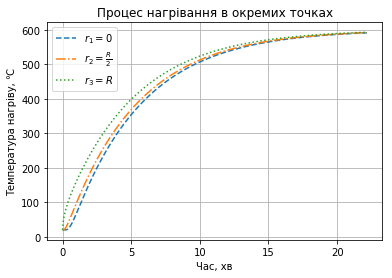

In [60]:
x_time = np.linspace(0, time_heat/60, len(T_data))
it = iter(['--', '-.', ':'])
for y, labl in zip(T_data.T[[0, 5, 9]]-273.0, ['$r_1=0$', r'$r_2=\frac{R}{2}$', '$r_3 = R$']):
    plt.plot(x_time, y, next(it), label=labl)
plt.legend()
plt.title("Процес нагрівання в окремих точках")
plt.ylabel(u"Температура нагріву, ℃")
plt.xlabel(u"Час, хв")
plt.grid()

Динаміка нагрівання в усіх троьх зрізах системи однакова.

### Висновки

Реалізована детермінована числова математична модель із розподіленими параметрами та визначений час нагріву металевого виробу, який становить 20 хв.

Для зразка з даними параметрами урахування внутрішніх координат не вносить значних змін у результати.